<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Obiettivo:** creare un modello predittivo per risolvere un problema di classificazione attraverso l'utilizzo di KNN, seguendo la pipeline vista a lezione.
 

**Dataset:**
Il dataset da utilizzare contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani: dovrai capire il tipo di vino a partire dai suoi valori chimici.

Puoi caricare il dataset direttamente dalla libreria di Scikit-learn: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.

In [1]:
from sklearn import datasets

In [2]:
data = datasets.load_wine()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
data["data"].shape

(178, 13)

In [9]:
X = data['data']
y = data['target']

print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (178, 13) y shape: (178,)


In [13]:
import numpy as np
from numpy.random import default_rng

In [14]:
rnd = default_rng(seed = 12)
rnd

Generator(PCG64) at 0x7F8DD885C2E0

In [18]:
permutation = rnd.permutation(len(y))
permutation

array([162,  16,  78,  83,  91,  13,   8,  15,  60, 168, 164, 125,  24,
        79,  70,  87,  30, 149, 141, 117,  18, 126,  94, 135, 172, 134,
        14, 151,  35, 124,  82, 109, 123, 155,  40,  93,   2,   4,  52,
        98,  59,  28,  86, 175,  26,  12,  27,  23,  58, 128,  77,  38,
       100,  32,  75, 152, 131, 177, 144, 121, 118,  63, 146,  54, 112,
       122,  85, 142, 156, 176, 143,  53,  57,   0, 153,  22,  95, 136,
        55, 150,  88, 103,  36, 120, 137, 114,  97,  80,  61, 167, 163,
        43, 130, 115, 107,  56,  45,  49,  68,  72, 105, 104, 147,  67,
        21,   1, 106,  42,  37, 166,  90,  51, 148,  10, 145, 161, 139,
       102, 113, 173,  44,   3, 160, 174, 133,  17,  84, 132, 129, 119,
       108,   5,  92,   9,  73,  48,  71,  20,  96, 116,  47, 110,  81,
        25, 170, 159,  31, 111, 138,  62,  99,  46,  34,  89,  33, 127,
        41,  50,  11,  76, 140, 157, 169, 171,  69,  29, 158,  19,  66,
        65,  64,   6,  39, 101, 154,   7,  74, 165])

In [39]:
X = X[permutation]
y = y[permutation]

#Shuffling a mano

In [37]:
n_test = int(0.2* X.shape[0])
n_train = X.shape[0] - n_test
X_train, y_train = X[0:n_train], y[0:n_train]
X_test, y_test = X[n_train:], y[n_train:]

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((143, 13), (143,), (35, 13), (35,))

#Shuffling Sklearn

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
neigh = KNeighborsClassifier (n_neighbors=3)

In [67]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
neigh.predict(X_test)

array([2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [69]:
neigh.score(X_test, y_test)

0.8055555555555556

In [71]:
scores=[]
for i in range(1,40):
    neigh1 = KNeighborsClassifier(n_neighbors=i)
    neigh1.fit(X_train,y_train)
    score = neigh1.score(X_test, y_test)
    scores.append(score)

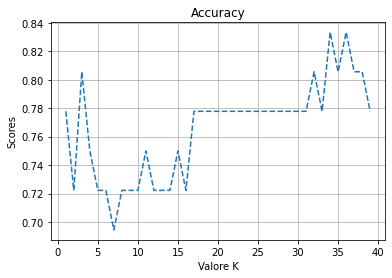

In [72]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),scores,"--")
plt.xlabel ("Valore K")
plt.ylabel("Scores")
plt.title("Accuracy")
plt.grid();